In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
from npeet.entropy_estimators import midd

* A fires with probability $p_A$
* B fires with probability $p_B$
* Probability of coincidence $p_{AB} = p_A p_B$
* Probability of neither firing $p_{0} = (1 - p_a)(1 - p_b)$
* When postselecting only those when at least one fired:
  - Probability that A fires
$$p_A' = \frac{N p_a}{N - N p_0} = \frac{p_a}{p_a + p_b - p_a p_b}$$
  - Probability that B fires
$$p_A' = \frac{N p_b}{N - N p_0} = \frac{p_b}{p_a + p_b - p_a p_b}$$
  - Probability that A and B fire simultaneously
$$p_{AB}' = p_{A}' p_{B}'$$
  - Probability that only A fires $\bar{p}_A' = p_A' - p_{AB}'$
  - Probability that only B fires $\bar{p}_B' = p_B' - p_{AB}'$
  
Finally the expected accuracy is defined as

$$
\frac{N'_{AB}}{N'_{AB} + \bar{N}'_{A} + \bar{N}'_{B}} = 
\frac{p_A' p_B'}{p_A' p_B' + p_A' + p_B' - 2 p_A' p_B'} = 
\frac{1}{\frac{1}{p_A'} + \frac{1}{p_B'} - 1}
$$

In [52]:
corr = lambda x,y: np.corrcoef(x,y)[0,1]
miEff = lambda x,y: mi(x[:, None], y[:, None])

def accEff(x, y):
    nTP = np.sum(x & y)
    nFP = np.sum(x & ~y)
    nFN = np.sum(~x & y)
    rez = nTP / (nTP + nFP + nFN)
    
    nPrim = nTP + nFP + nFN
    pX = np.sum(x) / nPrim
    pY = np.sum(y) / nPrim
    bias = 1 / (1 / pX + 1 / pY - 1)
    return rez - bias

## Test 1: Does Corr noise depend on sparsity in spikes

Results:
* Corr: No
* MI: No

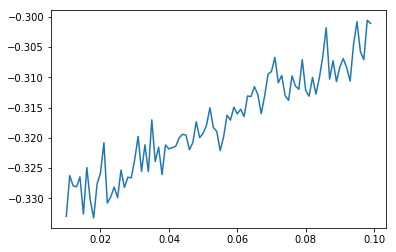

In [53]:
def noise_sparsity_test(method):
    pArr = np.arange(1, 10, 0.1) / 100

    rezLst = []
    for p in pArr:
        a = (np.random.uniform(0,1,10000) < p).astype(int)
        b = (np.random.uniform(0,1,10000) < p).astype(int)

        rezLst += [method(a, b)]

    plt.figure()
    plt.plot(pArr, rezLst)
    plt.show()
    
# noise_sparsity_test(corr)
# noise_sparsity_test(midd)
noise_sparsity_test(accEff)

## Test 2: Does Corr effect size depend on added sparsity


Result
* Corr: Yes, inflates artificially with increased sparsity
* MI: Yes, deflates artificially
    - Why deflates?
    - Why continuous estimator oscillates so much?

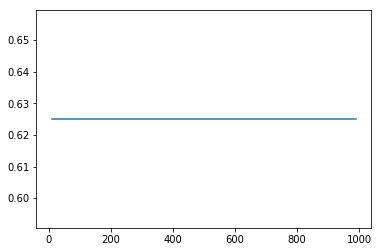

In [50]:
def effect_sparsity_test(method):
    a = [1] * 80 + [0] * 20
    b = [1] * 50 + [0] * 50

    nExtraLst = np.arange(10, 1000, 10)

    rezLst = []
    for iExtra in nExtraLst:
        rezLst += [method(np.array(a + [0]*iExtra), np.array(b + [0]*iExtra))]

    plt.figure()
    plt.plot(nExtraLst, rezLst)
    plt.show()
    
# effect_sparsity_test(corr)
# effect_sparsity_test(midd)
effect_sparsity_test(accEff)

## Test 3: Does noise Corr depend on frequency ratio

Result:
* Corr: No
* Mi: No

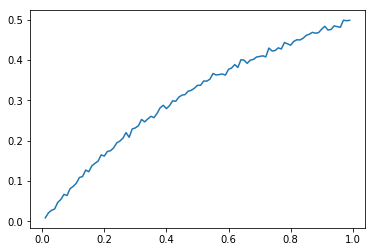

In [51]:
def noise_rate_test(method):
    pArr = np.arange(1, 100)/100

    rezLst = []
    for p in pArr:
        a = (np.random.uniform(0,1,10000) < 0.5).astype(int)
        b = (np.random.uniform(0,1,10000) < p).astype(int)
        rezLst += [method(a, b)]

    plt.figure()
    plt.plot(pArr, rezLst)
    plt.show()
    
# noise_rate_test(corr)
# noise_rate_test(midd)
noise_rate_test(accEff)